# 前処理
エクセルからグラフを作成
ノードの特徴量を設定

In [141]:
# データの読み込み
import pandas as pd

df = pd.read_excel('data/明治35年神奈川.xlsx', sheet_name="明治35")

# NaNが含まれる行を消す
df = df.dropna(subset=["會社名", "役員名"])

In [142]:
# グラフを作成
import networkx as nx


edges_df = df[["會社名", "役員名"]]
edges = edges_df.itertuples(index=False)
G = nx.Graph()
G.add_edges_from(edges)

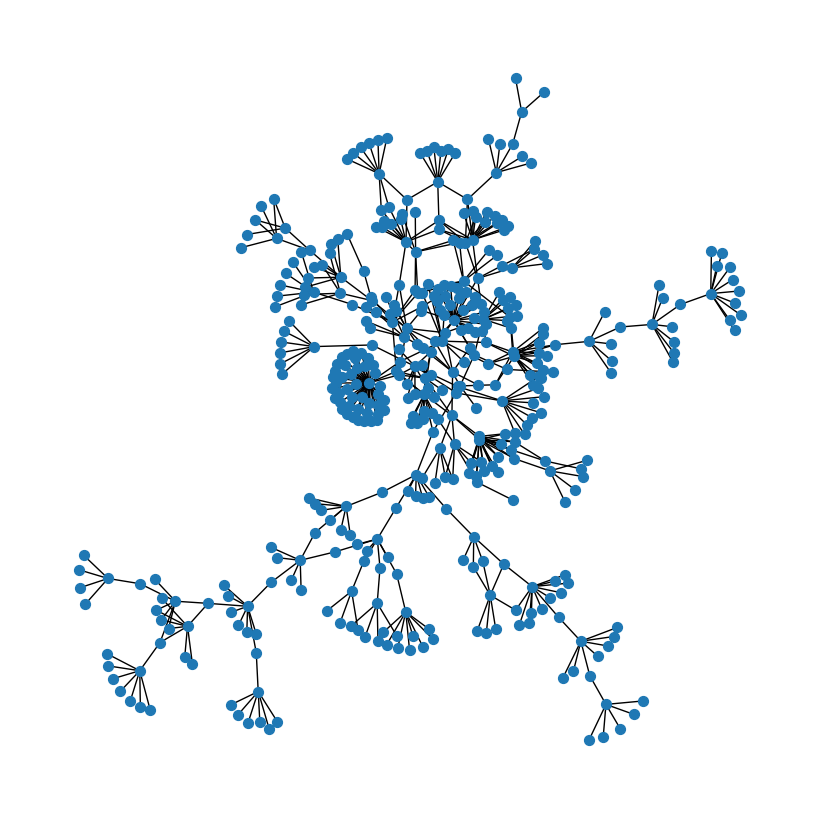

In [92]:
# 可視化
# graphvizバージョン
import matplotlib.pyplot as plt

# 最大連結成分のみ
largest_cc = max(nx.connected_components(G), key=len)
G_draw = G.subgraph(largest_cc)

# ノード名を数字に変換
# graphvizは旧字体があるとエラーが出る
node_mapping = {node: i for i, node in enumerate(G_draw.nodes())}
G_draw = nx.relabel_nodes(G_draw, node_mapping)

# グラフ描画
pos = nx.nx_pydot.graphviz_layout(G_draw)
plt.figure(figsize=(8,8)) # 適切なサイズで
nx.draw(G_draw, pos=pos, with_labels=False, font_family="MS Gothic", node_size=50, font_size=9)
plt.show()

## 特徴量の設定

### 資本金を特徴量にする
会社ノードに資本金を割り当てる

In [143]:
# 會社名と資本金のデータフレームを作成
shihon_df = df[["會社名", "資本金"]]

# 重複を消す
shihon_df = shihon_df.drop_duplicates(subset=['會社名'])
shihon_df

,會社名,資本金
0,横濱正金銀行,24000000.0
46,株式會社横濱七十四銀行,2000000.0
55,株式會社第二銀行,1500000.0
67,株式會社横濱銀行,1000000.0
75,株式會社横濱蠶絲銀行,1000000.0
...,...,...
1111,オリアンタール・バラス・ホテール合名會社,140000.0
1113,ヂューラン・エンド・コンパニー合名會社,40000.0
1114,井下合名會社,10000.0
1115,改良合名會社,50000.0


In [144]:
# 不正な値がある行を処理

# NaNを最小値に置き換える
shihon_df = shihon_df.fillna(min(shihon_df['資本金']))

# 文字列や不正な値がある行を表示
# '資本金' の要素が実数値かどうかを確認
invalid_values = shihon_df['資本金'].apply(lambda x: not isinstance(x, (int, float)))
print(shihon_df[invalid_values])

Empty DataFrame
Columns: [會社名, 資本金]
Index: []


In [145]:
# ノードに属性を割り当てる

# 會社名をキー、属性の辞書を値として辞書に変換
# 例: {'横濱正金銀行': {'資本金': 24000000.0}}
shihon_dict = shihon_df.set_index('會社名').to_dict(orient='index')

nx.set_node_attributes(G, shihon_dict)

In [146]:
G.nodes(data=True)

NodeDataView({'横濱正金銀行': {'資本金': 24000000.0}, '相馬永胤': {}, '三崎龜之助': {}, '園田孝吉': {}, '木村利右衛門': {}, '原六郎': {}, '若尾逸平': {}, '中井芳楠': {}, '田島信夫': {}, '渡邊福三郎': {}, '戸次兵吉': {}, '宮川久次郎': {}, '三澤恭哉': {}, '市川亮功': {}, '高橋正信': {}, '澤井宗之': {}, '乗竹孝太郎': {}, '松居十三郎': {}, '山川勇木': {}, '西巻豐佐久': {}, '安部成嘉': {}, '川島忠之助': {}, '高道竹雄': {}, '豐島守三郎': {}, '林政敏': {}, '靑木鐡太郎': {}, '巽孝之丞': {}, '長崎剛十郎': {}, '荒牧國三郎': {}, '小野政吉': {}, '菊池忠三郎': {}, '戸澤鼎': {}, '齋藤和行': {}, '今西兼三': {}, '櫻井久之助': {}, '長鉾郎': {}, '杉原泰雄': {}, '松尾吉士': {}, '兒玉謙次': {}, '穂積太郎': {}, '長岡長': {}, '鈴木島吉': {}, '竹内金平': {}, '中村錠太郎': {}, '伊東小三郎': {}, '鍋倉直': {}, '株式會社横濱七十四銀行': {'資本金': 2000000.0}, '大谷嘉兵衛': {}, '近藤良薫': {}, '箕田長三郎': {}, '茂木保平': {}, '森謙吾': {}, '長井利右衛門': {}, '竹内淸次郎': {}, '株式會社第二銀行': {'資本金': 1500000.0}, '原富太郎': {}, '增田嘉兵衛': {}, '樋口源六': {}, '朝田又七': {}, '安部幸兵衛': {}, '山縣量次': {}, '大村精鋭': {}, '和田義行': {}, '田原尚': {}, '鈴木俊夫': {}, '鈴木卯三郎': {}, '株式會社横濱銀行': {'資本金': 1000000.0}, '平沼專藏': {}, '平沼八太郎': {}, '平沼延治郎': {}, '馬塲金助': {}, '野田半七': {}, '相原定輔': {}, '吉田平吉': {

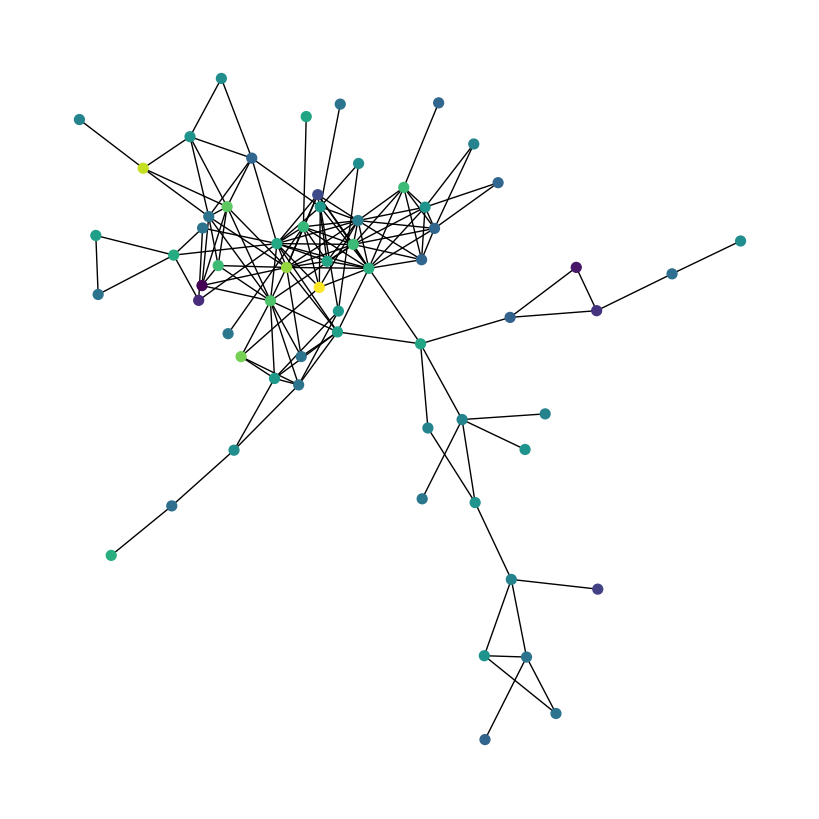

In [147]:
# 属性を可視化
from matplotlib.colors import LogNorm

# 1部グラフ
sub_G = nx.projected_graph(G, shihon_df["會社名"])

# 最大連結成分のみ
largest_cc = max(nx.connected_components(sub_G), key=len)
sub_G = sub_G.subgraph(largest_cc)

values = nx.get_node_attributes(sub_G, '資本金')

# ノードの value 属性のリストを作成
node_values = [values[node] for node in sub_G.nodes()]

cmap = plt.get_cmap("viridis")

# 最小値が0だとエラーが出る
# node_valuesから0を除外したリストを作成し、その中から最小値を取得
non_zero_values = [value for value in node_values if value > 0]
norm = LogNorm(vmin=min(non_zero_values), vmax=max(node_values))  # LogNormで正規化（対数スケール）
colors = [cmap(norm(value)) for value in node_values]

# ノード名を数字に変換
# graphvizは旧字体があるとエラーが出る
node_mapping = {node: i for i, node in enumerate(sub_G.nodes())}
G_draw = nx.relabel_nodes(sub_G, node_mapping)

np.random.seed(42)  # シード値を固定化
plt.figure(figsize=(8,8)) # 適切なサイズで
nx.draw(G_draw,
        pos=nx.nx_pydot.graphviz_layout(G_draw),
        node_size=50,
		node_color=colors
		)

In [148]:
# 保存
nx.write_graphml(nx.projected_graph(G, shihon_df["會社名"]), 'data/kanagawa_kigyou.graphml')